### 1. Getting Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_columns',None) # exibir todas as colunas do meu df
pd.set_option("display.max_seq_items", None) # exibir todas as linhas no meu for

In [2]:
#data = 'https://raw.githubusercontent.com/bruno-lima98/ml-zoomcamp-homework/refs/heads/main/01-classes/03-classification/telco_data.csv'
#!wget $data -O telco_data.csv

In [3]:
df = pd.read_csv('telco_data.csv')

### 2. Data Prep

In [4]:
# Padronizamos a escrita das colunas, títulos e informações

df.columns = df.columns.str.lower().str.replace(' ','_')
categorical_colums = list(df.dtypes[df.dtypes == 'object'].index)

for i in categorical_colums:
    df[i] = df[i].str.lower().str.replace(' ','_')

In [5]:
# Ajustamos a coluna totalcharges que é número mas estava como string por possuir espaços vazios

df['totalcharges'] = pd.to_numeric(df['totalcharges'].str.replace('_','0'))

In [6]:
# Ajustamos nossa variável target binária para 0/1 no lugar yes/no

df['churn'] = (df['churn'] == 'yes').astype('int')

In [7]:
df.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,7590-vhveg,female,0,yes,no,1,no,no_phone_service,dsl,no,yes,no,no,no,no,month-to-month,yes,electronic_check,29.85,29.85,0
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,no,yes,no,no,no,one_year,no,mailed_check,56.95,1889.50,0
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,yes,no,no,no,no,month-to-month,yes,mailed_check,53.85,108.15,1
3,7795-cfocw,male,0,no,no,45,no,no_phone_service,dsl,yes,no,yes,yes,no,no,one_year,no,bank_transfer_(automatic),42.30,1840.75,0
4,9237-hqitu,female,0,no,no,2,yes,no,fiber_optic,no,no,no,no,no,no,month-to-month,yes,electronic_check,70.70,151.65,1


### 3. Setting up Validation Framework

In [8]:
from sklearn.model_selection import train_test_split
# Separamos o nosso dataset em Treino, Validação e Teste usando uma biblioteca diretamente

In [9]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)

In [10]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [11]:
len(df_full_train), len(df_train), len(df_test), len(df_val)

(5634, 4225, 1409, 1409)

In [12]:
# Resetamos os indíces dos DFs apenas para não ficar embaralhado

df_full_train = df_full_train.reset_index(drop=True)
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [13]:
y_full_train = df_full_train['churn'].values
y_train = df_train['churn'].values
y_val = df_val['churn'].values
y_test = df_test['churn'].values

In [14]:
# del df_full_train['churn']
del df_train['churn']
del df_val['churn']
del df_test['churn']

### 4. EDA

In [15]:
df_full_train.isnull().sum()
# Verificamos que não temos mais valores nulos no df

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [16]:
global_churn_rate = df_full_train['churn'].value_counts(normalize=True)[1]
# Essa é uma forma de filtrar os valores. Calculei o % de cada categoria e depois chamei o valor da categoria que vale 1.

round(global_churn_rate,2)

np.float64(0.27)

In [17]:

numerical = ['tenure','monthlycharges','totalcharges']
categorical = [
                'gender', 'seniorcitizen', 'partner', 'dependents',
                'phoneservice', 'multiplelines', 'internetservice',
                'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
                'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
                'paymentmethod']

In [18]:
for i in categorical:
    print(f'{i:<17} | Total de categorias: {df_full_train[i].nunique()} | Categorias: {list(df_full_train[i].unique())}')

gender            | Total de categorias: 2 | Categorias: ['male', 'female']
seniorcitizen     | Total de categorias: 2 | Categorias: [np.int64(0), np.int64(1)]
partner           | Total de categorias: 2 | Categorias: ['yes', 'no']
dependents        | Total de categorias: 2 | Categorias: ['yes', 'no']
phoneservice      | Total de categorias: 2 | Categorias: ['yes', 'no']
multiplelines     | Total de categorias: 3 | Categorias: ['no', 'yes', 'no_phone_service']
internetservice   | Total de categorias: 3 | Categorias: ['no', 'dsl', 'fiber_optic']
onlinesecurity    | Total de categorias: 3 | Categorias: ['no_internet_service', 'yes', 'no']
onlinebackup      | Total de categorias: 3 | Categorias: ['no_internet_service', 'yes', 'no']
deviceprotection  | Total de categorias: 3 | Categorias: ['no_internet_service', 'yes', 'no']
techsupport       | Total de categorias: 3 | Categorias: ['no_internet_service', 'yes', 'no']
streamingtv       | Total de categorias: 3 | Categorias: ['no_internet_ser

### 5. Featuring Engineering

In [19]:
male_churn_rate = df_full_train[df_full_train['gender']=='male']['churn'].mean()
female_churn_rate = df_full_train[df_full_train['gender']=='female']['churn'].mean()

print(f'Taxa de Churn Global = {global_churn_rate:.4f} | Taxa (homens) = {male_churn_rate:.4f} | Taxa (mulheres) = {female_churn_rate:.4f}')

# Podemos ver que as taxas entre homens e mulheres são bem parecidas, indicando que talvez a variável de sexo não importe tanto

Taxa de Churn Global = 0.2700 | Taxa (homens) = 0.2632 | Taxa (mulheres) = 0.2768


In [20]:
partner_churn = df_full_train[df_full_train['partner']=='yes']['churn'].mean()
no_partner_churn = df_full_train[df_full_train['partner']=='no']['churn'].mean()

print(f'Taxa de Churn Global = {global_churn_rate:.4f} | Taxa (Com Parceiro) = {partner_churn:.4f} | Taxa (Sem Parceiro) = {no_partner_churn:.4f}')

# Podemos ver que há uma diferença considerável entre o churn em pessoas com parceiro e sem parceiro, indicando que essa talvez possa ser uma variável importante

Taxa de Churn Global = 0.2700 | Taxa (Com Parceiro) = 0.2050 | Taxa (Sem Parceiro) = 0.3298


In [21]:
a = ((df_full_train.groupby('paymentmethod')['churn'].mean() / global_churn_rate - 1).round(4)*100)
a[1]

/tmp/ipykernel_13855/3938576978.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  a[1]


np.float64(-39.129999999999995)

In [22]:
for i in categorical:
    a = (df_full_train.groupby(i)['churn'].mean() / global_churn_rate - 1).round(4)*100
    print(f'{i}')
    for j in range(len(a)):
        print(f'- {a.index[j]}: {a.values[j].round(2)}')

gender
- female: 2.54
- male: -2.5
seniorcitizen
- 0: -10.26
- 1: 53.12
partner
- no: 22.17
- yes: -24.05
dependents
- no: 16.22
- yes: -38.63
phoneservice
- no: -10.61
- yes: 1.14
multiplelines
- no: -4.65
- no_phone_service: -10.61
- yes: 7.69
internetservice
- dsl: -28.75
- fiber_optic: 57.49
- no: -71.18
onlinesecurity
- no: 55.92
- no_internet_service: -71.18
- yes: -43.24
onlinebackup
- no: 49.77
- no_internet_service: -71.18
- yes: -19.53
deviceprotection
- no: 46.64
- no_internet_service: -71.18
- yes: -14.65
techsupport
- no: 55.17
- no_internet_service: -71.18
- yes: -40.76
streamingtv
- no: 26.99
- no_internet_service: -71.18
- yes: 12.13
streamingmovies
- no: 25.54
- no_internet_service: -71.18
- yes: 13.82
contract
- month-to-month: 59.91
- one_year: -55.34
- two_year: -89.53
paperlessbilling
- no: -36.26
- yes: 25.26
paymentmethod
- bank_transfer_(automatic): -37.71
- credit_card_(automatic): -39.13
- electronic_check: 68.87
- mailed_check: -28.19


In [23]:
for i in categorical:
    df_group = df_full_train.groupby(i)['churn'].agg(['count','mean'])
    df_group['mean'] = (df_group['mean']).round(4)
    df_group['diff_abs'] = ((df_group['mean'] - (global_churn_rate))).round(4)
    df_group['risk'] = ((df_group['mean'] / (global_churn_rate))).round(4)

In [24]:
from IPython.display import display

for i in categorical:
    print(i)
    df_group_disp = df_full_train.groupby(i)['churn'].agg(['count','mean'])
    df_group_disp['mean'] = (df_group_disp['mean']*100).round(2)
    df_group_disp['diff_abs (%)'] = ((df_group_disp['mean'] - (global_churn_rate*100))).round(2)
    df_group_disp['risk (%)'] = ((df_group_disp['mean'] / (global_churn_rate*100) - 1)*100).round(2)

    df_group_disp = df_group_disp.rename(columns={'mean': 'mean (%)'})
    
    df_group_disp = df_group_disp.reset_index()

    display(df_group_disp)
    print()

gender


,gender,count,mean (%),diff_abs (%),risk (%)
0,female,2796,27.68,0.68,2.53
1,male,2838,26.32,-0.68,-2.51



seniorcitizen


,seniorcitizen,count,mean (%),diff_abs (%),risk (%)
0,0,4722,24.23,-2.77,-10.25
1,1,912,41.34,14.34,53.13



partner


,partner,count,mean (%),diff_abs (%),risk (%)
0,no,2932,32.98,5.98,22.16
1,yes,2702,20.50,-6.50,-24.07



dependents


,dependents,count,mean (%),diff_abs (%),risk (%)
0,no,3968,31.38,4.38,16.24
1,yes,1666,16.57,-10.43,-38.62



phoneservice


,phoneservice,count,mean (%),diff_abs (%),risk (%)
0,no,547,24.13,-2.87,-10.62
1,yes,5087,27.30,0.30,1.12



multiplelines


,multiplelines,count,mean (%),diff_abs (%),risk (%)
0,no,2700,25.74,-1.26,-4.66
1,no_phone_service,547,24.13,-2.87,-10.62
2,yes,2387,29.07,2.07,7.68



internetservice


,internetservice,count,mean (%),diff_abs (%),risk (%)
0,dsl,1934,19.23,-7.77,-28.77
1,fiber_optic,2479,42.52,15.52,57.50
2,no,1221,7.78,-19.22,-71.18



onlinesecurity


,onlinesecurity,count,mean (%),diff_abs (%),risk (%)
0,no,2801,42.09,15.09,55.91
1,no_internet_service,1221,7.78,-19.22,-71.18
2,yes,1612,15.32,-11.68,-43.25



onlinebackup


,onlinebackup,count,mean (%),diff_abs (%),risk (%)
0,no,2498,40.43,13.43,49.76
1,no_internet_service,1221,7.78,-19.22,-71.18
2,yes,1915,21.72,-5.28,-19.55



deviceprotection


,deviceprotection,count,mean (%),diff_abs (%),risk (%)
0,no,2473,39.59,12.59,46.65
1,no_internet_service,1221,7.78,-19.22,-71.18
2,yes,1940,23.04,-3.96,-14.66



techsupport


,techsupport,count,mean (%),diff_abs (%),risk (%)
0,no,2781,41.89,14.89,55.17
1,no_internet_service,1221,7.78,-19.22,-71.18
2,yes,1632,15.99,-11.01,-40.77



streamingtv


,streamingtv,count,mean (%),diff_abs (%),risk (%)
0,no,2246,34.28,7.28,26.98
1,no_internet_service,1221,7.78,-19.22,-71.18
2,yes,2167,30.27,3.27,12.12



streamingmovies


,streamingmovies,count,mean (%),diff_abs (%),risk (%)
0,no,2213,33.89,6.89,25.53
1,no_internet_service,1221,7.78,-19.22,-71.18
2,yes,2200,30.73,3.73,13.83



contract


,contract,count,mean (%),diff_abs (%),risk (%)
0,month-to-month,3104,43.17,16.17,59.91
1,one_year,1186,12.06,-14.94,-55.33
2,two_year,1344,2.83,-24.17,-89.52



paperlessbilling


,paperlessbilling,count,mean (%),diff_abs (%),risk (%)
0,no,2313,17.21,-9.79,-36.25
1,yes,3321,33.82,6.82,25.27



paymentmethod


,paymentmethod,count,mean (%),diff_abs (%),risk (%)
0,bank_transfer_(automatic),1219,16.82,-10.18,-37.70
1,credit_card_(automatic),1217,16.43,-10.57,-39.14
2,electronic_check,1893,45.59,18.59,68.87
3,mailed_check,1305,19.39,-7.61,-28.18


### 6. Feature Importance: Mutual Information

In [25]:
from sklearn.metrics import mutual_info_score

In [26]:
mutual_info_score(df_full_train['churn'],df_full_train['contract'])
# Essa função no permite ver a importância de uma variável em relação à outra.
# Dessa forma, se olhamos uma variável e comparamos com o churn, quanto maior o número, mais importância tem aquela variável sobre o churn

0.0983203874041556

In [27]:
mutual = {}
for i in categorical:
    a = round(mutual_info_score(df_full_train['churn'],df_full_train[i])*100,2)
    mutual[i] = a
df_mutual = pd.DataFrame(list(mutual.items()), columns=['feature', 'mutual_info (%)'])
df_mutual = df_mutual.sort_values(by="mutual_info (%)", ascending=False).reset_index(drop=True)
df_mutual

,feature,mutual_info (%)
0,contract,9.83
1,onlinesecurity,6.31
2,techsupport,6.10
3,internetservice,5.59
4,onlinebackup,4.69
5,deviceprotection,4.35
6,paymentmethod,4.32
7,streamingtv,3.19
8,streamingmovies,3.16
9,paperlessbilling,1.76


### 7. Correlation

In [28]:
df_full_train[numerical].corrwith(df_full_train['churn'])

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

### 8. One-Hot Encoding

In [29]:
from sklearn.feature_extraction import DictVectorizer

In [30]:
train_dicts = df_train[categorical + numerical].to_dict(orient='records')
val_dicts = df_val[categorical + numerical].to_dict(orient='records')

In [31]:
dv = DictVectorizer(sparse=False)

In [32]:
dv.fit(train_dicts)
list(dv.get_feature_names_out())

['contract=month-to-month',
 'contract=one_year',
 'contract=two_year',
 'dependents=no',
 'dependents=yes',
 'deviceprotection=no',
 'deviceprotection=no_internet_service',
 'deviceprotection=yes',
 'gender=female',
 'gender=male',
 'internetservice=dsl',
 'internetservice=fiber_optic',
 'internetservice=no',
 'monthlycharges',
 'multiplelines=no',
 'multiplelines=no_phone_service',
 'multiplelines=yes',
 'onlinebackup=no',
 'onlinebackup=no_internet_service',
 'onlinebackup=yes',
 'onlinesecurity=no',
 'onlinesecurity=no_internet_service',
 'onlinesecurity=yes',
 'paperlessbilling=no',
 'paperlessbilling=yes',
 'partner=no',
 'partner=yes',
 'paymentmethod=bank_transfer_(automatic)',
 'paymentmethod=credit_card_(automatic)',
 'paymentmethod=electronic_check',
 'paymentmethod=mailed_check',
 'phoneservice=no',
 'phoneservice=yes',
 'seniorcitizen',
 'streamingmovies=no',
 'streamingmovies=no_internet_service',
 'streamingmovies=yes',
 'streamingtv=no',
 'streamingtv=no_internet_servic

In [33]:
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [34]:
X_train.shape, X_val.shape

((4225, 45), (1409, 45))

### 9. Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [37]:
model.intercept_[0]

np.float64(-0.12066865593034165)

In [38]:
model.coef_[0].round(3)

array([ 0.639, -0.016, -0.734, -0.018, -0.093,  0.061, -0.11 , -0.062,
       -0.036, -0.075, -0.365,  0.364, -0.11 ,  0.   , -0.243,  0.118,
        0.014,  0.062, -0.11 , -0.063,  0.231, -0.11 , -0.232, -0.238,
        0.127, -0.123,  0.012, -0.087, -0.037,  0.066, -0.053,  0.118,
       -0.229,  0.193, -0.102, -0.11 ,  0.101, -0.062, -0.11 ,  0.06 ,
        0.181, -0.11 , -0.182, -0.068,  0.   ])

In [39]:
y_pred = model.predict_proba(X_val)[:,1]

In [40]:
churn_decision = (y_pred >= 0.5)

In [41]:
(y_val == churn_decision).mean() #accuracy


np.float64(0.8055358410220014)

In [42]:
df_pred = pd.DataFrame()

df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype('int')
df_pred['actual'] = y_val

df_pred['correct'] = df_pred['prediction'] == df_pred['actual']

df_pred

,probability,prediction,actual,correct
0,0.006762,0,0,True
1,0.205318,0,0,True
2,0.217839,0,0,True
3,0.566445,1,1,True
4,0.218485,0,0,True
...,...,...,...,...
1404,0.295050,0,0,True
1405,0.041609,0,1,False
1406,0.152767,0,0,True
1407,0.781836,1,1,True


In [43]:
df_pred['correct'].mean()

np.float64(0.8055358410220014)

### 10. Model Interpretation


In [44]:
list(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

[('contract=month-to-month', np.float64(0.639)),
 ('contract=one_year', np.float64(-0.016)),
 ('contract=two_year', np.float64(-0.734)),
 ('dependents=no', np.float64(-0.018)),
 ('dependents=yes', np.float64(-0.093)),
 ('deviceprotection=no', np.float64(0.061)),
 ('deviceprotection=no_internet_service', np.float64(-0.11)),
 ('deviceprotection=yes', np.float64(-0.062)),
 ('gender=female', np.float64(-0.036)),
 ('gender=male', np.float64(-0.075)),
 ('internetservice=dsl', np.float64(-0.365)),
 ('internetservice=fiber_optic', np.float64(0.364)),
 ('internetservice=no', np.float64(-0.11)),
 ('monthlycharges', np.float64(0.0)),
 ('multiplelines=no', np.float64(-0.243)),
 ('multiplelines=no_phone_service', np.float64(0.118)),
 ('multiplelines=yes', np.float64(0.014)),
 ('onlinebackup=no', np.float64(0.062)),
 ('onlinebackup=no_internet_service', np.float64(-0.11)),
 ('onlinebackup=yes', np.float64(-0.063)),
 ('onlinesecurity=no', np.float64(0.231)),
 ('onlinesecurity=no_internet_service', np

### 11. Using the Model

In [45]:
dicts_full_train = df_full_train[categorical+numerical].to_dict(orient='records')

In [46]:
dv = DictVectorizer(sparse=False)
X_full_train = dv.fit_transform(dicts_full_train)

In [47]:
y_full_train = df_full_train['churn'].values

In [48]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [49]:
dicts_test = df_test[categorical+numerical].to_dict(orient='records')

In [50]:
X_test = dv.transform(dicts_test)

In [51]:
y_pred = model.predict_proba(X_test)[:,1]

In [52]:
churn_decision = (y_pred >= 0.5)

In [53]:
(churn_decision == y_test).mean()

np.float64(0.8140525195173882)

### 12. Evaluation of Model

In [54]:
actual_positive = (y_test == 1)
actual_negative = (y_test == 0)

In [55]:
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [56]:
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

In [57]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [58]:
confusion = np.array([
    [tn, fp],
    [fn, tp]
])
confusion

array([[943, 118],
       [144, 204]])

In [59]:
(confusion / confusion.sum()).round(5)

array([[0.66927, 0.08375],
       [0.1022 , 0.14478]])

### 13. Precision and Recall

In [60]:
(tp + tn) / (tp + tn + fp + fn) # accuracy

np.float64(0.8140525195173882)

In [61]:
tp / (tp + fp) # precision

np.float64(0.6335403726708074)

In [62]:
tp / (tp + fn) # recall

np.float64(0.5862068965517241)

### 14. ROC Curves

In [63]:
tpr = tp / (tp + fn)
tpr

np.float64(0.5862068965517241)

In [64]:
fpr = fp / (fp + tn)
fpr

np.float64(0.1112158341187559)

In [ ]:
scores = []
thresholds = np.linspace(0, 1, 101)

for i in thresholds:
    actual_positive = (y_test == 1)
    actual_negative = (y_test == 0)

    t = i
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()

    scores.append((t, tp, fp, fn, tn))

In [ ]:
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)



In [70]:
df_scores['tpr'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
df_scores['fpr'] = df_scores['fp'] / (df_scores['fp'] + df_scores['tn'])

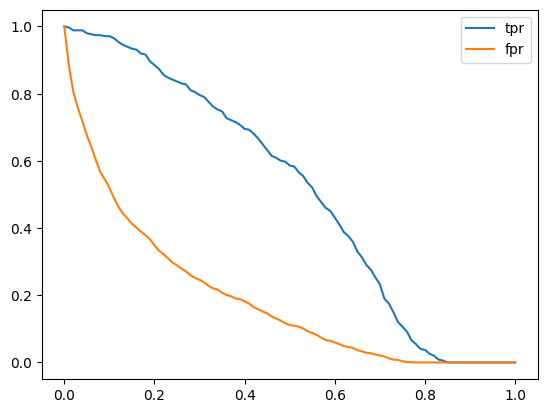

In [74]:
plt.plot(df_scores['threshold'], df_scores['tpr'], label='tpr')
plt.plot(df_scores['threshold'], df_scores['fpr'], label='fpr')
plt.legend()

### 15. Random Model

In [77]:
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_test))

In [80]:
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [81]:
def tpr_fpr_dataframe(y_test, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 101)

    for i in thresholds:
        actual_positive = (y_test == 1)
        actual_negative = (y_test == 0)

        t = i
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores['tp'] / (df_scores['tp'] + df_scores['fn'])
    df_scores['fpr'] = df_scores['fp'] / (df_scores['fp'] + df_scores['tn'])

    return df_scores

In [82]:
df_rand = tpr_fpr_dataframe(y_test, y_rand)

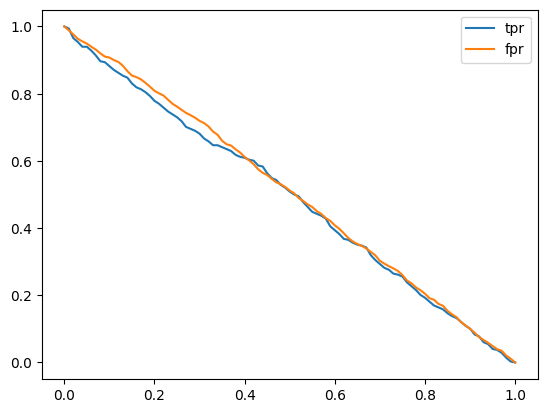

In [84]:
plt.plot(df_rand['threshold'], df_rand['tpr'], label='tpr')
plt.plot(df_rand['threshold'], df_rand['fpr'], label='fpr')
plt.legend()

### 16. Ideal Model

In [85]:
num_neg = (y_test == 0).sum()
num_pos = (y_test == 1).sum()
num_neg, num_pos

(np.int64(1061), np.int64(348))

In [88]:
y_ideal = np.repeat([0,1], [num_neg,num_pos])

In [90]:
y_ideal_pred = np.linspace(0,1,len(y_test))

In [94]:
((y_ideal_pred >= 0.753) == y_ideal).mean()

np.float64(1.0)

In [95]:
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)

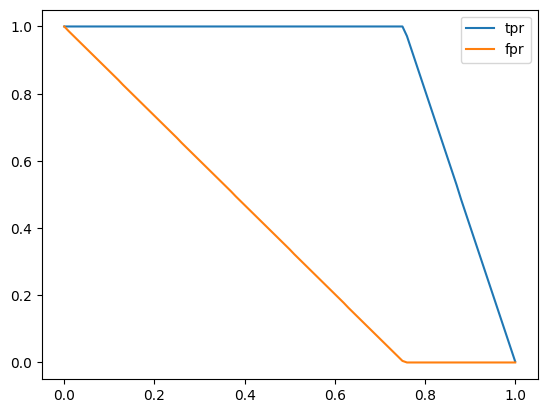

In [96]:
plt.plot(df_ideal['threshold'], df_ideal['tpr'], label='tpr')
plt.plot(df_ideal['threshold'], df_ideal['fpr'], label='fpr')
plt.legend()

### 17. Comparisson Geral

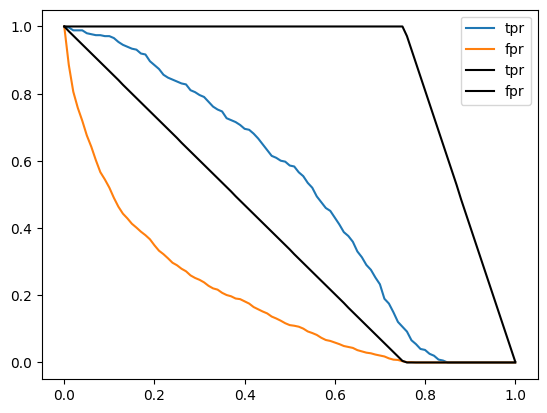

In [99]:
plt.plot(df_scores['threshold'], df_scores['tpr'], label='tpr')
plt.plot(df_scores['threshold'], df_scores['fpr'], label='fpr')

# plt.plot(df_rand['threshold'], df_rand['tpr'], label='tpr')
# plt.plot(df_rand['threshold'], df_rand['fpr'], label='fpr')

plt.plot(df_ideal['threshold'], df_ideal['tpr'], label='tpr', color='black')
plt.plot(df_ideal['threshold'], df_ideal['fpr'], label='fpr', color='black')
plt.legend()

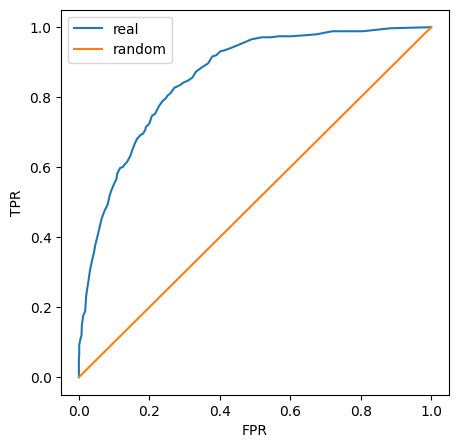

In [107]:
plt.figure(figsize=(5,5))

plt.plot(df_scores['fpr'], df_scores['tpr'], label='real')
# plt.plot(df_rand['fpr'], df_rand['tpr'], label='random')
plt.plot([0,1], [0,1], label='random')
# plt.plot(df_ideal['fpr'], df_ideal['tpr'], label='ideal')

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

### 18. ROC Curve from SkitLearn

In [108]:
from sklearn.metrics import roc_curve

In [110]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

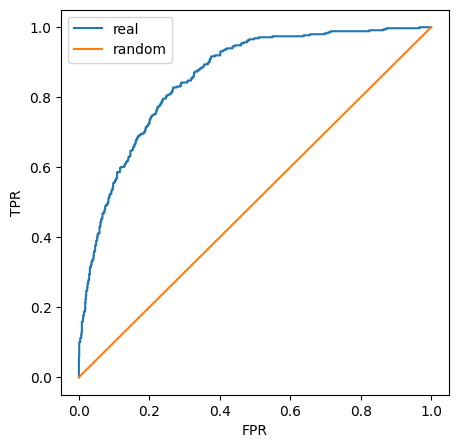

In [113]:
plt.figure(figsize=(5,5))

plt.plot(fpr, tpr, label='real')
plt.plot([0,1], [0,1], label='random')


plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()

### 19. Area Under ROC (AUC)

In [116]:
from sklearn.metrics import auc

In [118]:
auc(fpr, tpr)

0.8568079885599142

In [120]:
from sklearn.metrics import roc_auc_score

In [121]:
roc_auc_score(y_test, y_pred)

0.8568079885599142

### 20. Cross-Validation

In [152]:
def train(df_train, y_train, C):
    dicts = df_train[categorical+numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(max_iter=10000, C=C)
    model.fit(X_train, y_train)

    return dv, model

In [129]:
dv, model = train(df_train, y_train)

In [142]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [133]:
y_pred = predict(df_val, dv, model)

In [134]:
from sklearn.model_selection import KFold

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=1)

In [145]:
!pip install tqdm

In [146]:
from tqdm.auto import tqdm

In [148]:
scores = []

for train_idx, val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train['churn'].values
    y_val = df_val['churn'].values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

0it [00:00, ?it/s]

In [141]:
len(train_idx), len(val_idx)

(5070, 564)

In [151]:
print(f'{np.mean(scores):.3f} +- {np.std(scores):.3f}')

0.842 +- 0.012


In [153]:
dv, model = train(df_full_train, y_full_train, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8584032088573997